In [1]:
#import necessary library
import os
import sys
import warnings

warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../Scripts"))

In [2]:
from SalesPrediction import load_data, perform_EDA,Scatter_Plot,split_data,train_model,evaluation,Predict_sale

In [3]:
#Load the advertising dataset
df = load_data()

In [4]:
#Display the first few rows of the dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Stastical summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Preprocess Data

In [7]:
#check null value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Exploratory Data Analysis(EDA)

```Understand relationship between features and target variable.```

Correlation Matrix: Axes(0.125,0.11;0.62x0.77)


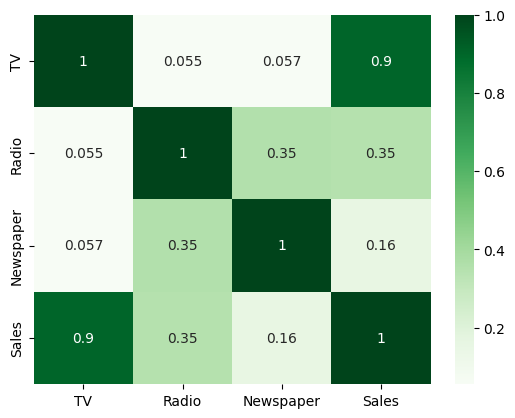

In [8]:
#check the correlation between features and sales
perform_EDA(df)

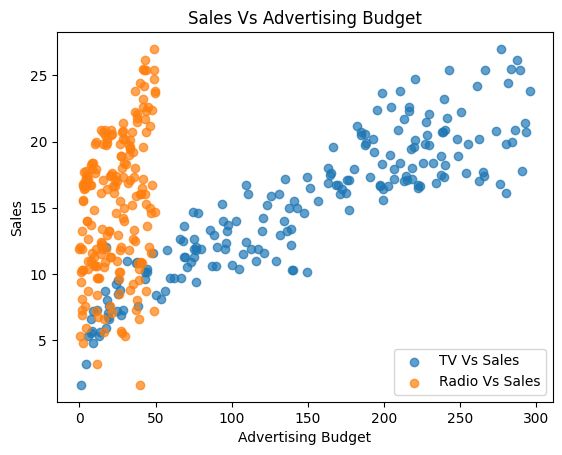

In [9]:
#Scatter plot of Sales vs Advertising budget
Scatter_Plot(df)

### split the Data into training and testing set

``` Split the data for training and evaluation to prevent overfitting.```

In [16]:
X_train,X_test,y_train,y_test = split_data(df)
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 160
Test set size: 40


#### Train the Model

```Use Linear Regression for modeling```

In [31]:
#initialize and train the model
model = train_model(X_train,y_train)
model


LinearRegression()

In [32]:
#Display model coefficients
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


### Test the Model

```Evaluate the model using the test dataset```

In [20]:
#Make predictions on the test data and Evaluate performance
evaluation(model,X_test,y_test)

Model Evaluation
Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


### Make Predictions

```Use the trained model to predict sales for new advertising budget```

In [33]:
new_budget = [250,40,50]
Predict_sale(model,new_budget)

Predicted Sales for budget [250, 40, 50]: 22.596090948339008
